In [260]:
# ----- IMPORTACION DE LIBRERIAS -----
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
from otsu import umbralizacionOtsu
from canny import cargarFoto


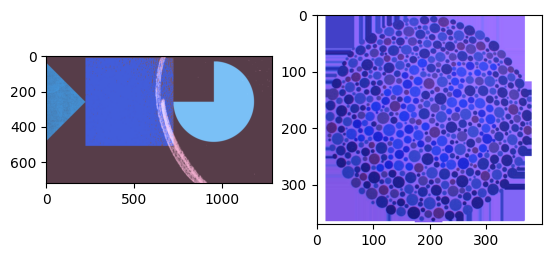

In [261]:
# ----- IMAGENES DE PRUEBA -----
foto1 = 'figuras.png'
foto2 = 'ishihara-18.png'
imagen1 = cv2.imread(foto1,1)
imagen2 = cv2.imread(foto2,1)
plt.subplot(1, 2, 1)
plt.imshow(imagen1)
plt.subplot(1, 2, 2)
plt.imshow(imagen2)
filas1, columnas1,_ = imagen1.shape
filas2, columnas2,_ = imagen2.shape

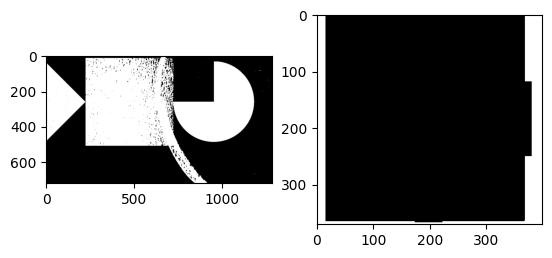

In [262]:
# ------ BINARIZACION DE LA IMAGEN ------
umbral1, imgOtsu1 = umbralizacionOtsu(foto1)
umbral2, imgOtsu2 = umbralizacionOtsu(foto2)
plt.subplot(1, 2, 1)
plt.imshow(imgOtsu1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(imgOtsu2, cmap='gray')

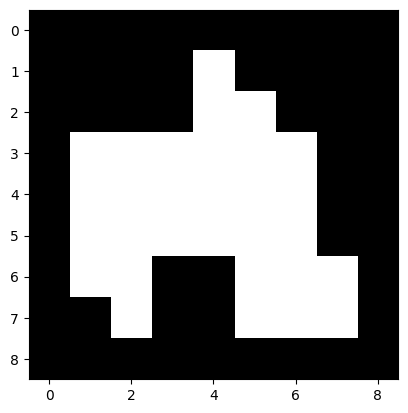

In [263]:
prueba = np.array([[0,0,0,0,0,0,0,0,0],
[0,0,0,0,255,0,0,0,0],
[0,0,0,0,255,255,0,0,0],
[0,255,255,255,255,255,255,0,0],
[0,255,255,255,255,255,255,0,0],
[0,255,255,255,255,255,255,0,0],
[0,255,255,0,0,255,255,255,0],
[0,0,255,0,0,255,255,255,0],
[0,0,0,0,0,0,0,0,0]])
filasp = 9
columnasp = 9
plt.imshow(prueba,cmap='gray')

In [264]:
def puntoInicio(imgBinarizada):
    # Encuentra el primer píxel blanco en los bordes de la imagen para comenzar la cadena
    for x in range(1, imgBinarizada.shape[0] - 1):
        for y in range(1, imgBinarizada.shape[1] - 1):
            if imgBinarizada[x, y] == 255:
                    return x, y
    return None

inicio = puntoInicio(prueba)
print(inicio)

(1, 4)


In [265]:
def chainFreeman4(imgBinarizada, puntoInicio):
    cadena = []
    coordenadas = []

    x, y = puntoInicio
    
    while True:
        if imgBinarizada[x, y] == -1:
            break
        imgBinarizada[x, y] = -1 
        coordenadas.append((x, y))

        # Derecha
        if y < imgBinarizada.shape[1] - 1 and imgBinarizada[x, y + 1] == 255:
            cadena.append(0)
            y += 1
        # Arriba
        elif x > 0 and imgBinarizada[x + 1, y] == 255:
            cadena.append(1)
            x += 1
        # Izquierda
        elif y > 0 and imgBinarizada[x, y - 1] == 255:
            cadena.append(2)
            y -= 1
        # Abajo
        elif x < imgBinarizada.shape[0] - 1 and imgBinarizada[x - 1, y] == 255:
            cadena.append(3)
            x -= 1
        else:
            break

    return cadena,coordenadas

cadena, coordenadas = chainFreeman4(prueba,inicio)
print("Cadena: ", cadena)
print("Coordenandas: ", coordenadas)

Cadena:  [1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 3, 3, 2, 2, 2, 1, 1]
Coordenandas:  [(1, 4), (2, 4), (2, 5), (3, 5), (3, 6), (4, 6), (5, 6), (6, 6), (6, 7), (7, 7), (7, 6), (7, 5), (6, 5), (5, 5), (5, 4), (5, 3), (5, 2), (6, 2), (7, 2)]


In [266]:
def chainFreemanConnectivity4WithCoordinates(imgBinarizada, puntoInicio):
    cadena = []  # Lista para almacenar la cadena de Freeman
    coordenadas = []  # Lista para almacenar las coordenadas de los puntos
    x, y = puntoInicio  # Inicializa las coordenadas con el punto de inicio
    retroceder = False  # Variable para controlar si debemos retroceder

    while True:
        if imgBinarizada[x, y] == -1:
            if not cadena:
                break  # Si no hay más direcciones en la cadena, termina la búsqueda
            else:
                retroceder = True
        else:
            imgBinarizada[x, y] = -1  # Marca el píxel visitado
            coordenadas.append((x, y))  # Agrega las coordenadas del punto actual
            if not retroceder:
                # Derecha
                if y < imgBinarizada.shape[1] - 1 and imgBinarizada[x, y + 1] == 255:
                    cadena.append(0)
                    y += 1
                # Arriba
                elif x > 0 and imgBinarizada[x - 1, y] == 255:
                    cadena.append(1)
                    x -= 1
                # Izquierda
                elif y > 0 and imgBinarizada[x, y - 1] == 255:
                    cadena.append(2)
                    y -= 1
                # Abajo
                elif x < imgBinarizada.shape[0] - 1 and imgBinarizada[x + 1, y] == 255:
                    cadena.append(3)
                    x += 1
                else:
                    retroceder = True
            if retroceder:
                if cadena:
                    ultima_direccion = cadena.pop()
                    # Retrocede en la dirección opuesta a la última dirección visitada
                    if ultima_direccion == 0:
                        y -= 1
                    elif ultima_direccion == 1:
                        x += 1
                    elif ultima_direccion == 2:
                        y += 1
                    elif ultima_direccion == 3:
                        x -= 1
                else:
                    break  # Si no hay más direcciones en la cadena, termina la búsqueda
    return cadena, coordenadas  # Devuelve la cadena de Freeman y las coordenadas de los puntos



cadena1, coordenadas1 = chainFreemanConnectivity4WithCoordinates(prueba,inicio)
print("Cadena: ", cadena1)
print("Coordenandas: ", coordenadas1)

Cadena:  []
Coordenandas:  []


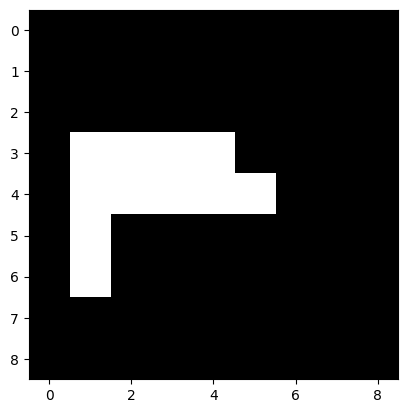

In [267]:
prueba = 255 - prueba

plt.imshow(prueba, cmap='Greys')
plt.plot([i[1] for i in coordenadas1], [i[0] for i in coordenadas1], 'ro')  # 'ro' para puntos rojos
plt.show()

In [269]:
def firstDifference(cadena):
     diferencias = []
     for i in range(1, len(cadena)):
        diff = (cadena[i] - cadena[i - 1]) % 4
        diferencias.append(diff)
     return diferencias

mindD = firstDifference(cadena)
print("Cadena con diferencias minimas: ", mindD)

Cadena con diferencias minimas:  [3, 1, 3, 1, 0, 0, 3, 1, 1, 0, 1, 0, 3, 0, 0, 3, 0]


In [ ]:
def minimumMagnitude(cadena):
     return